In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1ho4fWmr1THutOF44gM2s50l_PMALM3Tk
!gdown 1NSVg9MfGkBcqOF9PMqx-LM3z8ogkVu2-
!gdown 1iCokZiJ9OoDys0J1l4G8UniVRR4iTMeK

Downloading...
From: https://drive.google.com/uc?id=1ho4fWmr1THutOF44gM2s50l_PMALM3Tk
To: /content/timeseries_proj - data1.csv
100% 8.40k/8.40k [00:00<00:00, 18.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NSVg9MfGkBcqOF9PMqx-LM3z8ogkVu2-
To: /content/timeseries_proj - targetvar.csv
100% 2.08k/2.08k [00:00<00:00, 6.59MB/s]
Downloading...
From: https://drive.google.com/uc?id=1iCokZiJ9OoDys0J1l4G8UniVRR4iTMeK
To: /content/timeseries_proj - media.csv
100% 1.82k/1.82k [00:00<00:00, 7.01MB/s]


In [ ]:
df_media = pd.read_csv("timeseries_proj - media.csv")
df_media.head()

,TIMEDESC,Vehicle,CAMPAIGN,Spend
0,6/17/19,Digital,Ad1,152123.968800
1,6/24/19,Digital,Ad1,152123.206000
2,10/6/19,Digital,Ad1,152122.389900
3,1/7/19,Traditional,TV_ad1,7397.507571
4,1/8/19,Traditional,TV_ad1,5171.557764


In [ ]:
df_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TIMEDESC  48 non-null     object 
 1   Vehicle   48 non-null     object 
 2   CAMPAIGN  48 non-null     object 
 3   Spend     48 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.6+ KB


In [ ]:
df_media['TIMEDESC'] = pd.to_datetime(df_media['TIMEDESC'], format='%m/%d/%y')

In [ ]:
df_media['Weeks'] = df_media['TIMEDESC'].dt.strftime('%Y%U')
# df_media = df_media[df_media['TIMEDESC'] <= pd.to_datetime('2019-10-31')]


In [ ]:
df_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   TIMEDESC  48 non-null     datetime64[ns]
 1   Vehicle   48 non-null     object        
 2   CAMPAIGN  48 non-null     object        
 3   Spend     48 non-null     float64       
 4   Weeks     48 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.0+ KB


In [ ]:
df_media.head(10)

,TIMEDESC,Vehicle,CAMPAIGN,Spend,Weeks
0,2019-06-17,Digital,Ad1,152123.968800,201924
1,2019-06-24,Digital,Ad1,152123.206000,201925
2,2019-10-06,Digital,Ad1,152122.389900,201940
3,2019-01-07,Traditional,TV_ad1,7397.507571,201901
4,2019-01-08,Traditional,TV_ad1,5171.557764,201901
5,2019-03-06,Traditional,TV_ad1,8645.511881,201909
6,2019-05-08,Traditional,TV_ad1,140312.618800,201918
7,2019-06-17,Traditional,TV_ad1,276792.813200,201924
8,2019-06-24,Traditional,TV_ad1,276793.010900,201925
9,2019-07-15,Traditional,TV_ad1,24319.705790,201928


In [ ]:
df_pivot = df_media.drop('TIMEDESC', axis = 1)
df_pivot.head()

,Vehicle,CAMPAIGN,Spend,Weeks
0,Digital,Ad1,152123.968800,201924
1,Digital,Ad1,152123.206000,201925
2,Digital,Ad1,152122.389900,201940
3,Traditional,TV_ad1,7397.507571,201901
4,Traditional,TV_ad1,5171.557764,201901


In [ ]:
df_pivot = pd.pivot_table(
    df_pivot,
    values= 'Spend',
    index= 'Weeks',
    columns= ['Vehicle', 'CAMPAIGN'],
    aggfunc='sum',
    margins= True,
    margins_name = 'Total'

)
df_pivot = df_pivot.fillna(0)
df_pivot = df_pivot.sort_index()
df_pivot.head()

Vehicle  Digital                              Sponsorship Traditional  \
CAMPAIGN     Ad1          Ad2      Others Experimental_ad      Others   
Weeks                                                                   
201850       0.0      0.00000    0.000000     83333.94331         0.0   
201851       0.0      0.00000    0.000000     83335.16602         0.0   
201852       0.0      0.00000    0.000000     11905.64780         0.0   
201900       0.0      0.00000  337.918567         0.00000         0.0   
201901       0.0  21088.99356    0.000000         0.00000         0.0   

Vehicle                                       Total  
CAMPAIGN        TV_ad1        TV_ad2                 
Weeks                                                
201850        0.000000       0.00000   83333.943310  
201851        0.000000       0.00000   83335.166020  
201852        0.000000       0.00000   11905.647800  
201900        0.000000       0.00000     337.918567  
201901    12569.065335  165700.89407  199358.952965

In [ ]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 201850 to Total
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   (Digital, Ad1)                  27 non-null     float64
 1   (Digital, Ad2)                  27 non-null     float64
 2   (Digital, Others)               27 non-null     float64
 3   (Sponsorship, Experimental_ad)  27 non-null     float64
 4   (Traditional, Others)           27 non-null     float64
 5   (Traditional, TV_ad1)           27 non-null     float64
 6   (Traditional, TV_ad2)           27 non-null     float64
 7   (Total, )                       27 non-null     float64
dtypes: float64(8)
memory usage: 1.9+ KB


In [ ]:
df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]

In [ ]:
df_pivot = df_pivot.reset_index()

In [ ]:
df_pivot.head()

,Weeks,Digital_Ad1,Digital_Ad2,Digital_Others,Sponsorship_Experimental_ad,Traditional_Others,Traditional_TV_ad1,Traditional_TV_ad2,Total_
0,201850,0.0,0.00000,0.000000,83333.94331,0.0,0.000000,0.00000,83333.943310
1,201851,0.0,0.00000,0.000000,83335.16602,0.0,0.000000,0.00000,83335.166020
2,201852,0.0,0.00000,0.000000,11905.64780,0.0,0.000000,0.00000,11905.647800
3,201900,0.0,0.00000,337.918567,0.00000,0.0,0.000000,0.00000,337.918567
4,201901,0.0,21088.99356,0.000000,0.00000,0.0,12569.065335,165700.89407,199358.952965


In [ ]:
def adstock(series, decay):
  result = []
  accumulated = 0
  for value in series:
    accumulated = value + accumulated * decay
    result.append(accumulated)
  return result

def apply_adstock(df, columns_adstocked, decay):
  for col in columns_adstocked:
    df_pivot[f'adstock_{col}'] = adstock(df_pivot[col], decay)
  return df

columns_adstocked = ['Digital_Ad1', 'Digital_Ad2', 'Digital_Others', 'Sponsorship_Experimental_ad', 'Traditional_Others', 'Traditional_TV_ad1', 'Traditional_TV_ad2']
decay = 0.1
df_pivot = apply_adstock(df_pivot, columns_adstocked, decay)

In [ ]:
df_pivot.drop(['Digital_Ad1', 'Digital_Ad2', 'Digital_Others', 'Sponsorship_Experimental_ad', 'Traditional_Others', 'Traditional_TV_ad1', 'Traditional_TV_ad2'],
axis=1, inplace=True)

df_pivot.head()

,Weeks,Total_,adstock_Digital_Ad1,adstock_Digital_Ad2,adstock_Digital_Others,adstock_Sponsorship_Experimental_ad,adstock_Traditional_Others,adstock_Traditional_TV_ad1,adstock_Traditional_TV_ad2
0,201850,83333.943310,0.0,0.00000,0.000000,83333.943310,0.0,0.000000,0.00000
1,201851,83335.166020,0.0,0.00000,0.000000,91668.560351,0.0,0.000000,0.00000
2,201852,11905.647800,0.0,0.00000,0.000000,21072.503835,0.0,0.000000,0.00000
3,201900,337.918567,0.0,0.00000,337.918567,2107.250384,0.0,0.000000,0.00000
4,201901,199358.952965,0.0,21088.99356,33.791857,210.725038,0.0,12569.065335,165700.89407


In [ ]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Weeks                                27 non-null     object 
 1   Total_                               27 non-null     float64
 2   adstock_Digital_Ad1                  27 non-null     float64
 3   adstock_Digital_Ad2                  27 non-null     float64
 4   adstock_Digital_Others               27 non-null     float64
 5   adstock_Sponsorship_Experimental_ad  27 non-null     float64
 6   adstock_Traditional_Others           27 non-null     float64
 7   adstock_Traditional_TV_ad1           27 non-null     float64
 8   adstock_Traditional_TV_ad2           27 non-null     float64
dtypes: float64(8), object(1)
memory usage: 2.0+ KB


In [ ]:
df_sales = pd.read_csv("timeseries_proj - data1.csv")
df_sales.head()

,Weeks,l7d_Base,l7d,p4w_Base,p4w_Base.1,p4w,p3m_Base,p3m_Base.1,p3m,MeetNeeds_Base,MeetNeeds,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity
0,201801,77,1.38%,74,77,9.64%,74,78,27.58%,70,25.20%,76,93.25%,77,-,72,26.65%
1,201802,59,1.73%,58,61,6.70%,58,62,13.23%,53,17.09%,63,90.04%,60,-,57,14.80%
2,201803,44,-,39,41,7.65%,39,44,27.32%,41,12.58%,44,97.65%,41,-,41,23.20%
3,201804,55,-,50,55,3.87%,50,53,11.63%,50,6.24%,51,92.59%,54,-,50,8.63%
4,201805,50,2.15%,45,48,4.30%,45,47,19.69%,38,10.65%,50,82.47%,48,-,39,15.78%


In [ ]:
df_sales['Weeks'] = df_sales['Weeks'].astype(str)

In [ ]:
df_merge = pd.merge(df_pivot, df_sales, on='Weeks', how='inner')

In [ ]:
df_merge.head()

,Weeks,Total_,adstock_Digital_Ad1,adstock_Digital_Ad2,adstock_Digital_Others,adstock_Sponsorship_Experimental_ad,adstock_Traditional_Others,adstock_Traditional_TV_ad1,adstock_Traditional_TV_ad2,l7d_Base,...,p3m_Base.1,p3m,MeetNeeds_Base,MeetNeeds,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity
0,201850,83333.943310,0.0,0.000000,0.000000,83333.943310,0.0,0.000000,0.000000,83,...,83,18.26%,77,15.79%,85,92.60%,85,-,80,22.41%
1,201851,83335.166020,0.0,0.000000,0.000000,91668.560351,0.0,0.000000,0.000000,43,...,41,17.47%,40,11.45%,41,87.57%,42,-,38,8.61%
2,201901,199358.952965,0.0,21088.993560,33.791857,210.725038,0.0,12569.065335,165700.894070,75,...,72,18.58%,67,11.53%,76,88.42%,76,1.41%,63,11.07%
3,201902,2422.315809,0.0,2108.899356,2425.694995,21.072504,0.0,1256.906534,16570.089407,132,...,132,15.35%,124,15.64%,133,93.30%,133,0.78%,124,13.15%
4,201903,2422.742326,0.0,210.889936,2665.311825,2.107250,0.0,125.690653,1657.008941,127,...,125,17.03%,110,7.57%,126,85.38%,126,-,108,14.04%


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Weeks                                24 non-null     object 
 1   Total_                               24 non-null     float64
 2   adstock_Digital_Ad1                  24 non-null     float64
 3   adstock_Digital_Ad2                  24 non-null     float64
 4   adstock_Digital_Others               24 non-null     float64
 5   adstock_Sponsorship_Experimental_ad  24 non-null     float64
 6   adstock_Traditional_Others           24 non-null     float64
 7   adstock_Traditional_TV_ad1           24 non-null     float64
 8   adstock_Traditional_TV_ad2           24 non-null     float64
 9   l7d_Base                             24 non-null     int64  
 10  l7d                                  24 non-null     object 
 11  p4w_Base                          

In [ ]:
df_target = pd.read_csv("timeseries_proj - targetvar.csv")
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TIMEDESC  99 non-null     int64  
 1   target1   99 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [ ]:
df_target.rename(columns={'TIMEDESC': 'Weeks'}, inplace= True)
df_target['Weeks'] = df_target['Weeks'].astype(str)
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weeks    99 non-null     object 
 1   target1  99 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
df = pd.merge(df_merge, df_target, on='Weeks')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Weeks                                21 non-null     object 
 1   Total_                               21 non-null     float64
 2   adstock_Digital_Ad1                  21 non-null     float64
 3   adstock_Digital_Ad2                  21 non-null     float64
 4   adstock_Digital_Others               21 non-null     float64
 5   adstock_Sponsorship_Experimental_ad  21 non-null     float64
 6   adstock_Traditional_Others           21 non-null     float64
 7   adstock_Traditional_TV_ad1           21 non-null     float64
 8   adstock_Traditional_TV_ad2           21 non-null     float64
 9   l7d_Base                             21 non-null     int64  
 10  l7d                                  21 non-null     object 
 11  p4w_Base                          

In [ ]:
df.head(20)

,Weeks,Total_,adstock_Digital_Ad1,adstock_Digital_Ad2,adstock_Digital_Others,adstock_Sponsorship_Experimental_ad,adstock_Traditional_Others,adstock_Traditional_TV_ad1,adstock_Traditional_TV_ad2,l7d_Base,...,p3m,MeetNeeds_Base,MeetNeeds,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity,target1
0,201850,83333.943310,0.000000,0.000000,0.000000,8.333394e+04,0.000000,0.000000,0.000000,83,...,18.26%,77,15.79%,85,92.60%,85,-,80,22.41%,0.132857
1,201851,83335.166020,0.000000,0.000000,0.000000,9.166856e+04,0.000000,0.000000,0.000000,43,...,17.47%,40,11.45%,41,87.57%,42,-,38,8.61%,0.126077
2,201901,199358.952965,0.000000,21088.993560,33.791857,2.107250e+02,0.000000,12569.065335,165700.894070,75,...,18.58%,67,11.53%,76,88.42%,76,1.41%,63,11.07%,0.118401
3,201902,2422.315809,0.000000,2108.899356,2425.694995,2.107250e+01,0.000000,1256.906534,16570.089407,132,...,15.35%,124,15.64%,133,93.30%,133,0.78%,124,13.15%,0.098307
4,201903,2422.742326,0.000000,210.889936,2665.311825,2.107250e+00,0.000000,125.690653,1657.008941,127,...,17.03%,110,7.57%,126,85.38%,126,-,108,14.04%,0.095422
5,201904,1385.148311,0.000000,21.088994,1651.679494,2.107250e-01,0.000000,12.569065,165.700894,92,...,16.06%,84,11.89%,95,90.82%,92,-,88,13.38%,0.086361
6,201906,9022.252974,0.000000,9024.361873,165.167949,2.107250e-02,0.000000,1.256907,16.570089,117,...,12.42%,100,15.01%,113,88.50%,113,-,102,13.01%,0.119062
7,201909,8645.511881,0.000000,902.436187,16.516795,2.107250e-03,0.000000,8645.637572,1.657009,107,...,19.00%,95,12.95%,108,87.56%,109,-,97,14.05%,0.108170
8,201918,326586.121180,0.000000,77987.023199,1.651679,2.107250e-04,108376.722800,141177.182557,0.165701,114,...,18.00%,88,18.90%,113,76.58%,115,-,89,17.67%,0.130416
9,201924,452317.032880,152123.968800,7798.702320,23400.416048,2.107250e-05,10837.672280,290910.531456,0.016570,83,...,20.52%,79,13.36%,82,96.17%,82,1.27%,77,17.34%,0.122901


In [ ]:
df['FirstMention'].value_counts()

FirstMention
-        13
1.41%     1
0.78%     1
1.27%     1
0.89%     1
1.71%     1
1.22%     1
1.77%     1
1.84%     1
Name: count, dtype: int64

In [ ]:
df = df.replace('-', np.nan)
df.head()

,Weeks,Total_,adstock_Digital_Ad1,adstock_Digital_Ad2,adstock_Digital_Others,adstock_Sponsorship_Experimental_ad,adstock_Traditional_Others,adstock_Traditional_TV_ad1,adstock_Traditional_TV_ad2,l7d_Base,...,p3m,MeetNeeds_Base,MeetNeeds,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity,target1
0,201850,83333.943310,0.0,0.000000,0.000000,83333.943310,0.0,0.000000,0.000000,83,...,18.26%,77,15.79%,85,92.60%,85,NaN,80,22.41%,0.132857
1,201851,83335.166020,0.0,0.000000,0.000000,91668.560351,0.0,0.000000,0.000000,43,...,17.47%,40,11.45%,41,87.57%,42,NaN,38,8.61%,0.126077
2,201901,199358.952965,0.0,21088.993560,33.791857,210.725038,0.0,12569.065335,165700.894070,75,...,18.58%,67,11.53%,76,88.42%,76,1.41%,63,11.07%,0.118401
3,201902,2422.315809,0.0,2108.899356,2425.694995,21.072504,0.0,1256.906534,16570.089407,132,...,15.35%,124,15.64%,133,93.30%,133,0.78%,124,13.15%,0.098307
4,201903,2422.742326,0.0,210.889936,2665.311825,2.107250,0.0,125.690653,1657.008941,127,...,17.03%,110,7.57%,126,85.38%,126,NaN,108,14.04%,0.095422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Weeks                                21 non-null     object 
 1   Total_                               21 non-null     float64
 2   adstock_Digital_Ad1                  21 non-null     float64
 3   adstock_Digital_Ad2                  21 non-null     float64
 4   adstock_Digital_Others               21 non-null     float64
 5   adstock_Sponsorship_Experimental_ad  21 non-null     float64
 6   adstock_Traditional_Others           21 non-null     float64
 7   adstock_Traditional_TV_ad1           21 non-null     float64
 8   adstock_Traditional_TV_ad2           21 non-null     float64
 9   l7d_Base                             21 non-null     int64  
 10  l7d                                  18 non-null     object 
 11  p4w_Base                          

In [ ]:
df.drop(['p4w_Base', 'p3m_Base'], axis=1, inplace = True)

In [ ]:
df['l7d'].head()

0    1.22%
1      NaN
2      NaN
3    1.64%
4      NaN
Name: l7d, dtype: object

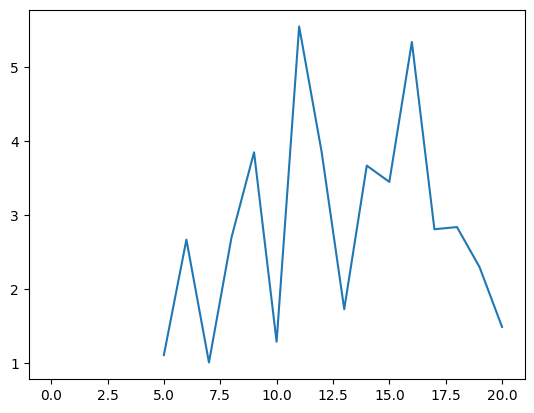

In [ ]:
df['l7d'] = df['l7d'].str.replace('%', '')
df['l7d'] = pd.to_numeric(df['l7d'], errors='coerce')

plt.plot(df['l7d'])
plt.show()

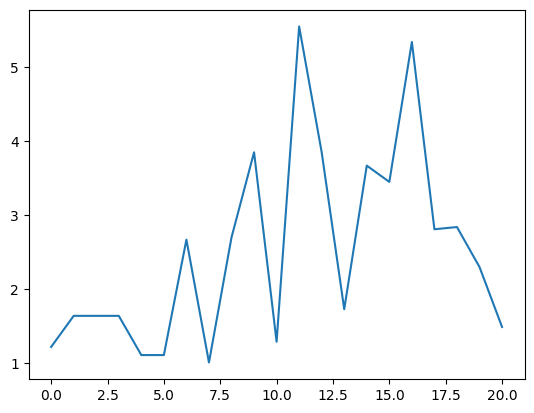

In [ ]:
df['l7d'].fillna(method='bfill', inplace=True)

plt.plot(df['l7d'])
plt.show()

In [ ]:
df = df.applymap(lambda x:x.replace('%', '') if isinstance(x, str) else x)
df.head()

,Weeks,Total_,adstock_Digital_Ad1,adstock_Digital_Ad2,adstock_Digital_Others,adstock_Sponsorship_Experimental_ad,adstock_Traditional_Others,adstock_Traditional_TV_ad1,adstock_Traditional_TV_ad2,l7d_Base,...,p3m,MeetNeeds_Base,MeetNeeds,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity,target1
0,201850,83333.943310,0.0,0.000000,0.000000,83333.943310,0.0,0.000000,0.000000,83,...,18.26,77,15.79,85,92.60,85,NaN,80,22.41,0.132857
1,201851,83335.166020,0.0,0.000000,0.000000,91668.560351,0.0,0.000000,0.000000,43,...,17.47,40,11.45,41,87.57,42,NaN,38,8.61,0.126077
2,201901,199358.952965,0.0,21088.993560,33.791857,210.725038,0.0,12569.065335,165700.894070,75,...,18.58,67,11.53,76,88.42,76,1.41,63,11.07,0.118401
3,201902,2422.315809,0.0,2108.899356,2425.694995,21.072504,0.0,1256.906534,16570.089407,132,...,15.35,124,15.64,133,93.30,133,0.78,124,13.15,0.098307
4,201903,2422.742326,0.0,210.889936,2665.311825,2.107250,0.0,125.690653,1657.008941,127,...,17.03,110,7.57,126,85.38,126,NaN,108,14.04,0.095422


In [ ]:
df = df.apply(pd.to_numeric, errors= 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Weeks                                21 non-null     int64  
 1   Total_                               21 non-null     float64
 2   adstock_Digital_Ad1                  21 non-null     float64
 3   adstock_Digital_Ad2                  21 non-null     float64
 4   adstock_Digital_Others               21 non-null     float64
 5   adstock_Sponsorship_Experimental_ad  21 non-null     float64
 6   adstock_Traditional_Others           21 non-null     float64
 7   adstock_Traditional_TV_ad1           21 non-null     float64
 8   adstock_Traditional_TV_ad2           21 non-null     float64
 9   l7d_Base                             21 non-null     int64  
 10  l7d                                  21 non-null     float64
 11  p4w_Base.1                        

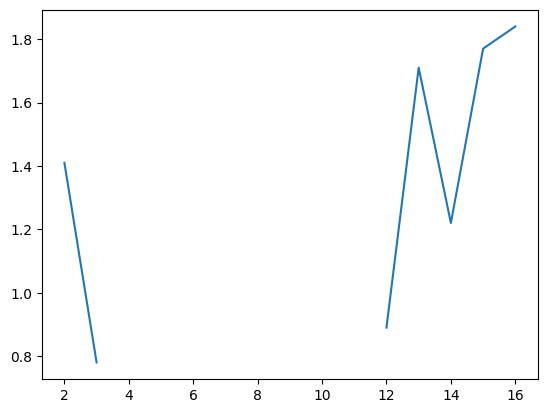

In [ ]:
plt.plot(df['FirstMention'])
plt.show()

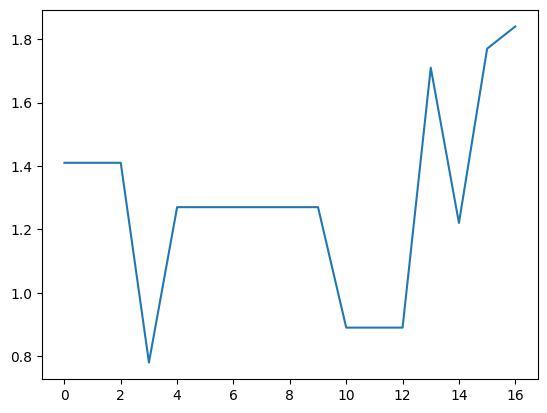

In [ ]:
df['FirstMention'].fillna(method='bfill', inplace=True)

plt.plot(df['FirstMention'])
plt.show()

In [ ]:
# mean_FirstMention = df['FirstMention'].mean()
df['FirstMention'].fillna('0', inplace = True)
df['FirstMention'] = pd.to_numeric(df['FirstMention'], errors='coerce')
df['FirstMention'].isna().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Weeks                                21 non-null     int64  
 1   Total_                               21 non-null     float64
 2   adstock_Digital_Ad1                  21 non-null     float64
 3   adstock_Digital_Ad2                  21 non-null     float64
 4   adstock_Digital_Others               21 non-null     float64
 5   adstock_Sponsorship_Experimental_ad  21 non-null     float64
 6   adstock_Traditional_Others           21 non-null     float64
 7   adstock_Traditional_TV_ad1           21 non-null     float64
 8   adstock_Traditional_TV_ad2           21 non-null     float64
 9   l7d_Base                             21 non-null     int64  
 10  l7d                                  21 non-null     float64
 11  p4w_Base.1                        

In [ ]:
df = df.rename(columns={'p4w_Base.1':'p4w_Base','p3m_Base.1':'p3m_Base'})

In [ ]:
def apply_percentage(df, percentage_columns):

  for col in percentage_columns:
    value = f'{col}_Base'
    df[col] = (df[value] * df[col])/ 100
  return df

percentage_columns = ['l7d', 'p4w', 'p3m', 'MeetNeeds', 'TotalAwareness', 'FirstMention', 'Affinity']
df = apply_percentage(df, percentage_columns)

df.head()

,Weeks,Total_,adstock_Digital_Ad1,adstock_Digital_Ad2,adstock_Digital_Others,adstock_Sponsorship_Experimental_ad,adstock_Traditional_Others,adstock_Traditional_TV_ad1,adstock_Traditional_TV_ad2,l7d_Base,...,p3m,MeetNeeds_Base,MeetNeeds,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity,target1
0,201850,83333.943310,0.0,0.000000,0.000000,83333.943310,0.0,0.000000,0.000000,83,...,15.1558,77,12.1583,85,78.7100,85,1.1985,80,17.9280,0.132857
1,201851,83335.166020,0.0,0.000000,0.000000,91668.560351,0.0,0.000000,0.000000,43,...,7.1627,40,4.5800,41,35.9037,42,0.5922,38,3.2718,0.126077
2,201901,199358.952965,0.0,21088.993560,33.791857,210.725038,0.0,12569.065335,165700.894070,75,...,13.3776,67,7.7251,76,67.1992,76,1.0716,63,6.9741,0.118401
3,201902,2422.315809,0.0,2108.899356,2425.694995,21.072504,0.0,1256.906534,16570.089407,132,...,20.2620,124,19.3936,133,124.0890,133,1.0374,124,16.3060,0.098307
4,201903,2422.742326,0.0,210.889936,2665.311825,2.107250,0.0,125.690653,1657.008941,127,...,21.2875,110,8.3270,126,107.5788,126,1.6002,108,15.1632,0.095422


In [ ]:
columns_drop = [col for col in df.columns if col.endswith('_Base')]
df = df.drop(columns=columns_drop)
df.head()

,Weeks,Total_,adstock_Digital_Ad1,adstock_Digital_Ad2,adstock_Digital_Others,adstock_Sponsorship_Experimental_ad,adstock_Traditional_Others,adstock_Traditional_TV_ad1,adstock_Traditional_TV_ad2,l7d,p4w,p3m,MeetNeeds,TotalAwareness,FirstMention,Affinity,target1
0,201850,83333.943310,0.0,0.000000,0.000000,83333.943310,0.0,0.000000,0.000000,1.0126,5.2896,15.1558,12.1583,78.7100,1.1985,17.9280,0.132857
1,201851,83335.166020,0.0,0.000000,0.000000,91668.560351,0.0,0.000000,0.000000,0.7052,1.0374,7.1627,4.5800,35.9037,0.5922,3.2718,0.126077
2,201901,199358.952965,0.0,21088.993560,33.791857,210.725038,0.0,12569.065335,165700.894070,1.2300,8.4952,13.3776,7.7251,67.1992,1.0716,6.9741,0.118401
3,201902,2422.315809,0.0,2108.899356,2425.694995,21.072504,0.0,1256.906534,16570.089407,2.1648,10.1376,20.2620,19.3936,124.0890,1.0374,16.3060,0.098307
4,201903,2422.742326,0.0,210.889936,2665.311825,2.107250,0.0,125.690653,1657.008941,1.4097,6.2952,21.2875,8.3270,107.5788,1.6002,15.1632,0.095422


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_size = int(len(df)*0.8)
train, test = df[:train_size], df[train_size:]

def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

def r_squared(y_true, y_pred):
  ss_res = np.sum((y_true - y_pred) ** 2)
  ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
  return 1-(ss_res/ss_tot)

def adj_r(r_squared, n, k):
  return 1- ((1- r_squared)*(n-1)/(n-k-1))

features = df.columns.difference(['target1'])
X_train, y_train = train[features], train['target1']
X_test, y_test = test[features], test['target1']

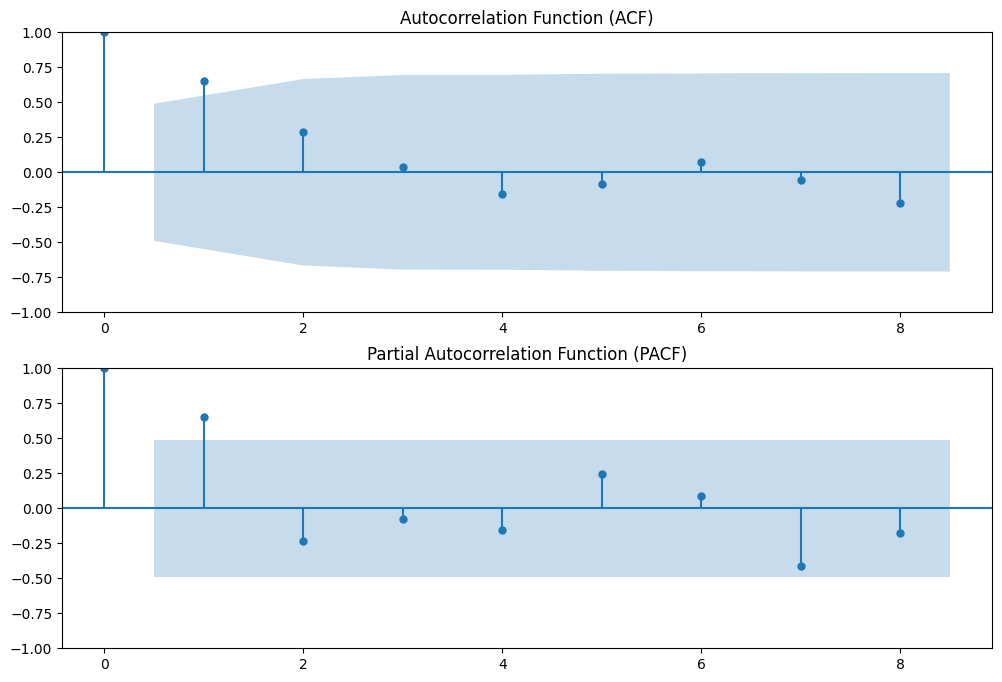

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

max_lags = len(y_train)//2

fig, ax = plt.subplots(2, 1, figsize=(12,8))

plot_acf(y_train, ax=ax[0], lags=max_lags)
ax[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(y_train, ax = ax[1], lags=max_lags)
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(y_train)
print('ADF Statistic: ', results[0])
print('p-value: ', results[1])
for key, value in results[4].items():
  print('Critical values:')
  print(f'{key}, {value}')

ADF Statistic:  -0.8002062429382734
p-value:  0.8190614778262661
Critical values:
1%, -3.9644434814814815
Critical values:
5%, -3.0849081481481484
Critical values:
10%, -2.6818144444444445


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.3 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

d = pm.arima.ndiffs(y_train)
print(d)

0


In [ ]:
exog_train = train[features]
exog_test = test[features]

model_sarimax = SARIMAX(y_train, exog = exog_train, order=(2,2,1))
model_fit_sarimax = model_sarimax.fit()

forecast_sarimax = model_fit_sarimax.forecast(steps = len(test), exog = exog_test)

mape = mean_absolute_percentage_error(y_test, forecast_sarimax)
print(f'MAPE_SARIMAX: {mape}')

r_square = r_squared(y_test, forecast_sarimax)
print(f'r_squared: {r_square}')

adj_r_square = adj_r(r_square, n = len(test), k = len(features))

print(f'Adj R Squared: {adj_r_square}')

params_sarimax = model_fit_sarimax.params
print('SARIMAX coefficients:')
print(params_sarimax)

MAPE_SARIMAX: 93.29783420382623
r_squared: -53.42761832182964
Adj R Squared: 19.14253944060988
SARIMAX coefficients:
Affinity                               0.001062
FirstMention                          -0.004984
MeetNeeds                              0.000908
TotalAwareness                         0.000936
Total_                                 0.000002
Weeks                                  0.016796
adstock_Digital_Ad1                    0.000007
adstock_Digital_Ad2                   -0.000003
adstock_Digital_Others                -0.000023
adstock_Sponsorship_Experimental_ad    0.000007
adstock_Traditional_Others             0.000002
adstock_Traditional_TV_ad1            -0.000006
adstock_Traditional_TV_ad2            -0.000002
l7d                                    0.000259
p3m                                    0.000877
p4w                                   -0.003404
ar.L1                                  0.294283
ar.L2                                 -0.064242
ma.L1              

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


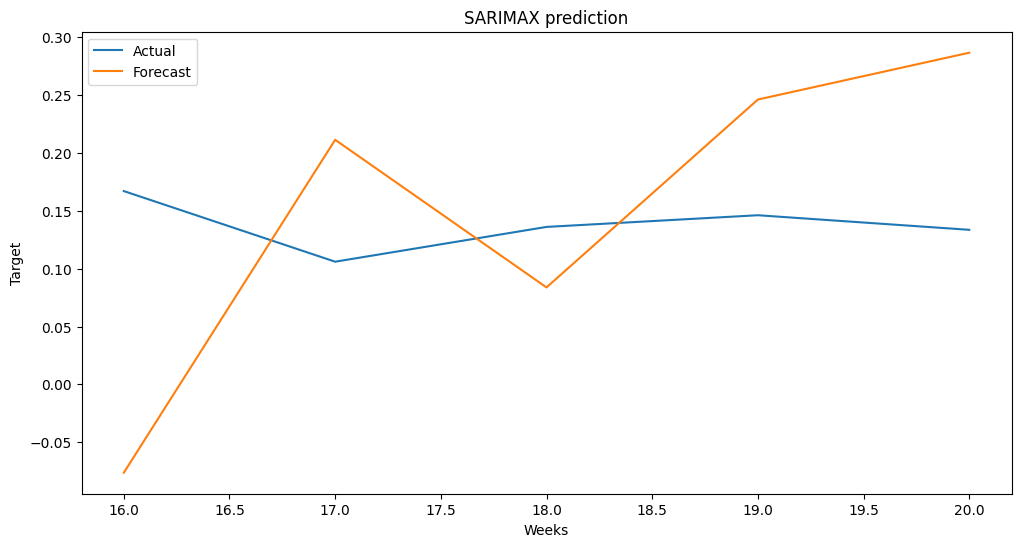

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label = 'Actual')
plt.plot(y_test.index, forecast_sarimax, label = 'Forecast')
plt.xlabel('Weeks')
plt.ylabel('Target')
plt.title('SARIMAX prediction')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


# Create lagged versions of the target variable
lags = 2
for lag in range(1, lags + 1):
    df[f'target1_lag_{lag}'] = df['target1'].shift(lag)

df.dropna(inplace=True)

additional_features = ['adstock_Digital_Ad1', 'adstock_Digital_Ad2', 'adstock_Digital_Others', 'adstock_Sponsorship_Experimental_ad',
                       'adstock_Traditional_Others', 'adstock_Traditional_TV_ad1', 'adstock_Traditional_TV_ad2',
                       'l7d', 'p4w', 'p3m',
                       'MeetNeeds', 'TotalAwareness',
                       'FirstMention', 'Affinity']
lagged_features = [f'target1_lag_{lag}' for lag in range(1, lags + 1)]
features = additional_features + lagged_features

X = df[features]
y = df['target1']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 11 to 20
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Weeks                                10 non-null     int64  
 1   Total_                               10 non-null     float64
 2   adstock_Digital_Ad1                  10 non-null     float64
 3   adstock_Digital_Ad2                  10 non-null     float64
 4   adstock_Digital_Others               10 non-null     float64
 5   adstock_Sponsorship_Experimental_ad  10 non-null     float64
 6   adstock_Traditional_Others           10 non-null     float64
 7   adstock_Traditional_TV_ad1           10 non-null     float64
 8   adstock_Traditional_TV_ad2           10 non-null     float64
 9   l7d                                  10 non-null     float64
 10  p4w                                  10 non-null     float64
 11  p3m                                  1

In [ ]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 0.00029462483296590215


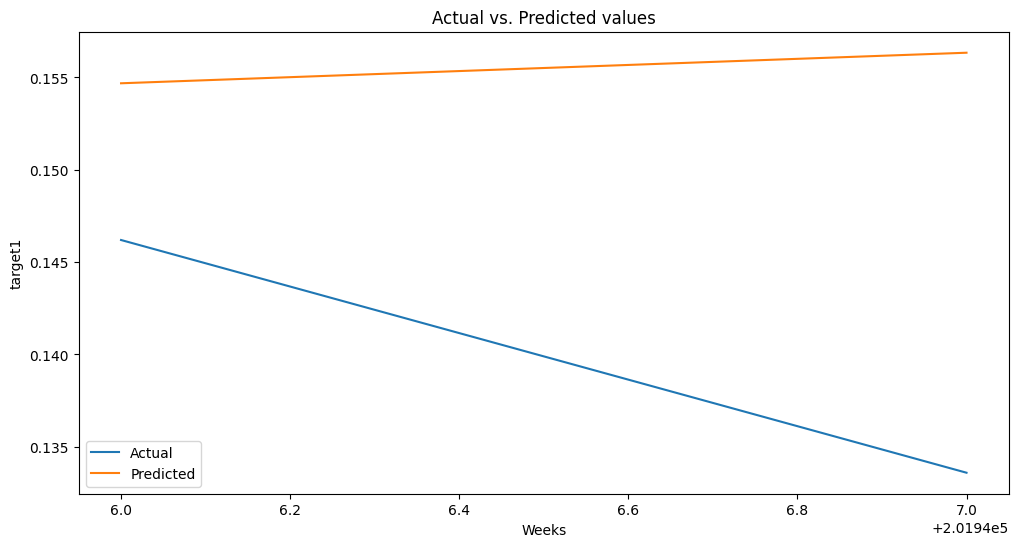

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df['Weeks'][train_size:], y_test, label='Actual')
plt.plot(df['Weeks'][train_size:], y_pred, label='Predicted')
plt.xlabel('Weeks')
plt.ylabel('target1')
plt.title('Actual vs. Predicted values')
plt.legend()
plt.show()


In [ ]:
# Get the coefficients of the model
coefficients = model.coef_

# Get the feature names
feature_names = X_train.columns

# Combine the feature names and coefficients into a DataFrame for better readability
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Display the coefficients
print(coeff_df)


                                Feature   Coefficient
0                   adstock_Digital_Ad1  1.419271e-06
1                   adstock_Digital_Ad2 -3.825601e-08
2                adstock_Digital_Others -1.667409e-05
3   adstock_Sponsorship_Experimental_ad -1.582973e-15
4            adstock_Traditional_Others -7.561339e-07
5            adstock_Traditional_TV_ad1  6.616804e-07
6            adstock_Traditional_TV_ad2  2.745868e-07
7                                   l7d -2.438317e-04
8                                   p4w -5.494219e-04
9                                   p3m  8.836554e-05
10                            MeetNeeds  1.888633e-03
11                       TotalAwareness -1.048194e-03
12                         FirstMention  3.197118e-04
13                             Affinity -1.283902e-03
14                        target1_lag_1  1.011385e-05
15                        target1_lag_2  9.517287e-06


In [ ]:
# !pip install pystan==2.19.1.1
# !pip install prophet

In [ ]:
import datetime

def convert_yyyyww_to_datetime(yyyyww):
    year = int(str(yyyyww)[:4])
    week = int(str(yyyyww)[4:])
    return pd.to_datetime(f'{year}-W{week-1}-1', format='%Y-W%W-%w')

df['Weeks'] = df['Weeks'].apply(convert_yyyyww_to_datetime)

print(df.head())


       Weeks  Digital_Ad1  Digital_Ad2  Digital_Others  \
0 2018-12-03          0.0      0.00000        0.000000   
1 2018-12-10          0.0      0.00000        0.000000   
2 2018-12-31          0.0  21088.99356        0.000000   
3 2019-01-07          0.0      0.00000     2422.315809   
4 2019-01-14          0.0      0.00000     2422.742326   

   Sponsorship_Experimental_ad  Traditional_Others  Traditional_TV_ad1  \
0                  83333.94331                 0.0            0.000000   
1                  83335.16602                 0.0            0.000000   
2                      0.00000                 0.0        12569.065335   
3                      0.00000                 0.0            0.000000   
4                      0.00000                 0.0            0.000000   

   Traditional_TV_ad2         Total_  l7d_Base  ...    p3m  MeetNeeds_Base  \
0             0.00000   83333.943310        83  ...  18.26              77   
1             0.00000   83335.166020        43  ..

In [ ]:
df_prophet = df.rename(columns={'Weeks': 'ds', 'target1': 'y'})

# Ensure other columns are used as regressors
regressors = df_prophet.columns.difference(['ds', 'y']).tolist()

# Print to verify
print(df_prophet.head())


          ds  Digital_Ad1  Digital_Ad2  Digital_Others  \
0 2018-12-03          0.0      0.00000        0.000000   
1 2018-12-10          0.0      0.00000        0.000000   
2 2018-12-31          0.0  21088.99356        0.000000   
3 2019-01-07          0.0      0.00000     2422.315809   
4 2019-01-14          0.0      0.00000     2422.742326   

   Sponsorship_Experimental_ad  Traditional_Others  Traditional_TV_ad1  \
0                  83333.94331                 0.0            0.000000   
1                  83335.16602                 0.0            0.000000   
2                      0.00000                 0.0        12569.065335   
3                      0.00000                 0.0            0.000000   
4                      0.00000                 0.0            0.000000   

   Traditional_TV_ad2         Total_  l7d_Base  ...    p3m  MeetNeeds_Base  \
0             0.00000   83333.943310        83  ...  18.26              77   
1             0.00000   83335.166020        43  ..

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3egajp2t/541t1voo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3egajp2t/6yohqe7o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64463', 'data', 'file=/tmp/tmp3egajp2t/541t1voo.json', 'init=/tmp/tmp3egajp2t/6yohqe7o.json', 'output', 'file=/tmp/tmp3egajp2t/prophet_modelar48d0cm/prophet_model-20240521112955.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:29:55 - cmdstanpy - INFO - Chain [1] start processing
I

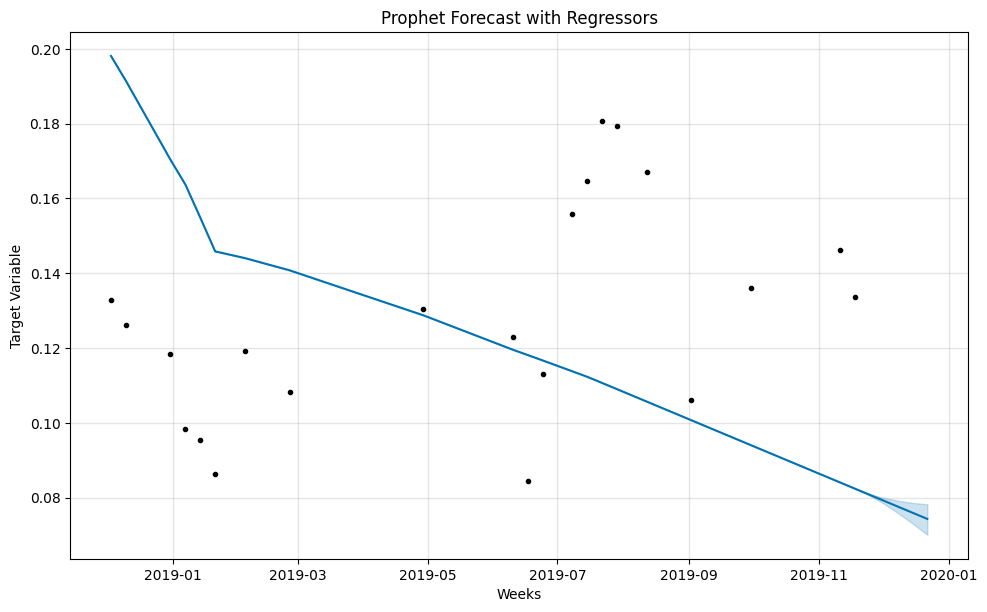

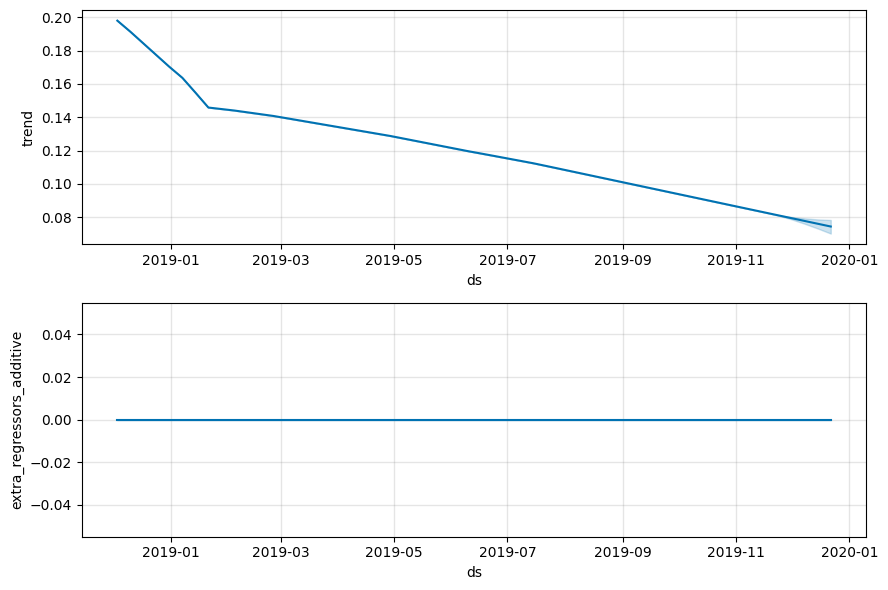

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

# # Initialize Prophet model
# model = Prophet()

# # Add regressors to the model
# for regressor in regressors:
#     model.add_regressor(regressor)

# # Fit the model
# model.fit(df_prophet)

# # Create future dataframe
# future = model.make_future_dataframe(periods=5, freq='W')  # Ensure frequency is set to weeks

# # Include regressors in the future DataFrame
# # Assuming the mean value for future regressors (or use more sophisticated approach)
# for regressor in regressors:
#     future[regressor] = df_prophet[regressor].mean()

# # Make predictions
# forecast = model.predict(future)

# # Plot the forecast
# fig = model.plot(forecast)
# plt.xlabel('Weeks')
# plt.ylabel('Target Variable')
# plt.title('Prophet Forecast with Regressors')
# plt.show()

# # Plot components
# fig2 = model.plot_components(forecast)
# plt.show()


In [ ]:
# Assuming df_prophet is your prepared DataFrame with Prophet-compatible format
# Sort by the 'ds' column to ensure data is in chronological order
df_prophet_sorted = df_prophet.sort_values('ds')

# Slice the dataset to keep only the last 4-5 weeks
last_weeks_data = df_prophet_sorted.tail(5)  # Adjust the number of weeks as needed


In [ ]:
# Slice the dataset to exclude the last 4-5 weeks
historical_data = df_prophet_sorted.iloc[:-5]

# Initialize Prophet model
model = Prophet()

# Add regressors to the model
for regressor in regressors:
    model.add_regressor(regressor)

# Fit the model on historical data
model.fit(historical_data)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3egajp2t/d_eajgof.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3egajp2t/oj0wm7cd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8526', 'data', 'file=/tmp/tmp3egajp2t/d_eajgof.json', 'init=/tmp/tmp3egajp2t/oj0wm7cd.json', 'output', 'file=/tmp/tmp3egajp2t/prophet_modelocdrcsyu/prophet_model-20240521113744.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:37:44 - cmdstanpy - INFO - Chain [1] start processing
IN

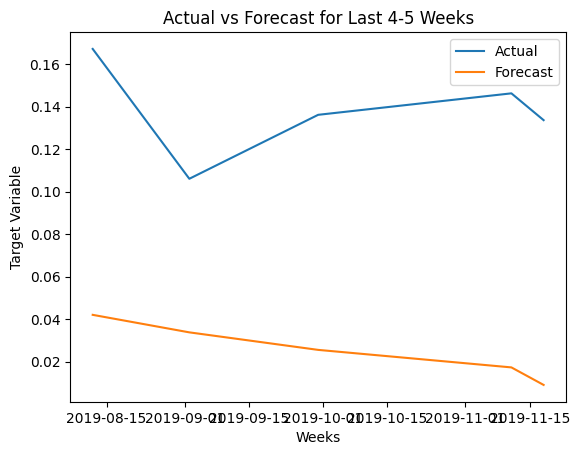

In [ ]:
# Create future dataframe for the last 4-5 weeks
future_last_weeks = model.make_future_dataframe(periods=5, freq='W')  # Adjust the number of weeks as needed
future_last_weeks = future_last_weeks.tail(5)  # Select only the last 5 weeks

# Include regressors in the future DataFrame
# Assuming the mean value for future regressors (or use more sophisticated approach)
for regressor in regressors:
    future_last_weeks[regressor] = df_prophet[regressor].mean()

# Make predictions for the last 4-5 weeks
forecast_last_weeks = model.predict(future_last_weeks)

# Extract actual values for the last 4-5 weeks
actual_last_weeks = df_prophet_sorted.tail(5)

# Plot the comparison
plt.plot(actual_last_weeks['ds'], actual_last_weeks['y'], label='Actual')
plt.plot(actual_last_weeks['ds'], forecast_last_weeks['yhat'], label='Forecast')
plt.xlabel('Weeks')
plt.ylabel('Target Variable')
plt.title('Actual vs Forecast for Last 4-5 Weeks')
plt.legend()
plt.show()
